In [1]:
"""
Import librarys
"""
import numpy as np 
import matplotlib.pyplot as plt
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


C:\Users\Tomas\AppData\Local\Temp\ipykernel_43192\3876516851.py:12: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<h2>Genera x y y </h2>

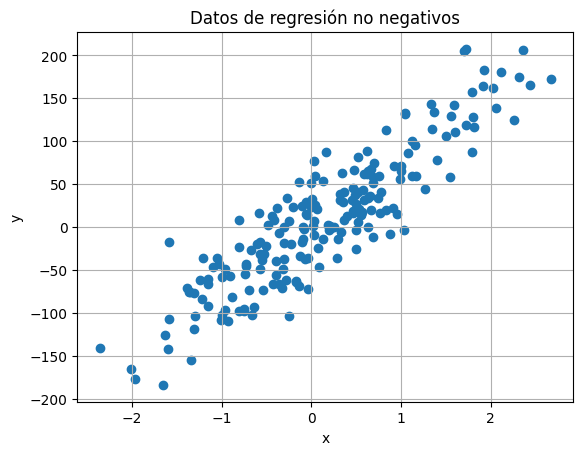

In [2]:
n_samples = 200
n_features = 1
noise = 35
#Modificar sin Normalizado
x_train, y_train = make_regression(
     n_samples=n_samples, n_features=n_features, noise=noise)

x_train = x_train.flatten()
y_train = y_train.flatten()

# print(f"x_train={x_train}")
# print(f"y_train={y_train}")
# Crear un DataFrame de pandas con los datos
data = pd.DataFrame({'x': x_train.flatten(), 'y': y_train})

# Guardar el DataFrame en un archivo CSV
data.to_csv('datos_regresion3.csv', index=False)
plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos de regresión no negativos')
plt.grid(True)
plt.show()

In [3]:
x_train = np.array([1.0, 2.0, 3.0])
y_train = np.array([300, 500, 600])
print(f"x_train={x_train}")
print(f"y_train={y_train}")

x_train=[1. 2. 3.]
y_train=[300 500 600]


<h2>Model Implementation</h2>

In [4]:

def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

<h2>MSE</h2>

In [5]:
def MSE(y, y_):
    m = y.shape[0]
    mse = 0
    for i in range(m):
        mse += (y[i] - y_[i]) ** 2
    return round(mse / m, 2)


<h2>Derivada parcial w, b</h2>

In [6]:
# def derivada_parcial_w(y_, y, x):
#     d_ = 0
#     m = y.shape[0]
#     for i in range(m):
#         d_ += (y_[i] - y[i]) * x[i]
#     return d_ / m

# def derivada_parcial_b(y_, y):
#     d_ = 0
#     m = y.shape[0]
#     for i in range(m):
#         d_ += (y_[i] - y[i]) 
#     return d_ / m

def derivada_parcial_b_w(w, b , y, x):
    d_w = 0
    d_b = 0
    m = y.shape[0]
    
    for i in range(m):
        f_wb = w * x[i] + b - y[i]
        d_w += f_wb * x[i]
        d_b += f_wb
        
    d_w = d_w / m
    d_b = d_b / m
    return round(d_w,2), round(d_b,2)



<h2>Gradiante descendente</h2>

In [7]:
def generate_gradiente(w, b , alpha , d_w , d_b):
    w = w - alpha * d_w
    b = b - alpha * d_b
    return w, b

<h2>Regresion Lineal</h2>

In [8]:
def generateGZ(x, w, b):
    z = w * x + b
    gz = 1 / (1 + np.exp(-z))
    plt.plot(x, gz)
    plt.title('Función Sigmoide')
    plt.xlabel('x')
    plt.ylabel('Salida Sigmoide')
    plt.grid(True)
    plt.show()
    return gz

<h2>generate Imagen</h2>

In [ ]:
def graficaExperimente(x_train, y_train, tmp_f_wb , w, b , imagen ,epoch):
    plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
    plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
    plt.title(f"Example {imagen} Housing prices w={w} , b = {b} epoch = {epoch}")
    plt.ylabel('x - price')
    plt.xlabel('y - size')
    plt.legend()
    plt.savefig(f"Prediccion_{imagen}_{w}_{b}.png" )
    plt.show()

def graficaGradiente(loss, w , b):
    plt.plot(loss, c='b',label='Loss')
    plt.title(f"Gradiente descendente w={w} , b = {b} ")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.savefig(f"Gradiente_{w}_{b}.png" )
    plt.show()

def generate_cuartil(data):
    np.random.seed(10)
    data = np.random.normal(100, 20, 200)    
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(data)
    plt.show()

def generate3DCosto(w_values, b_values ,loss_values):
    w_values = np.array(w_values)
    b_values = np.array(b_values)
    loss_values = np.array(loss_values)
    # Crear la figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar w, b y loss
    ax.plot(w_values, b_values, loss_values)

    # Etiquetas de los ejes
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_zlabel('Loss')

    # Mostrar la gráfica
    plt.show()



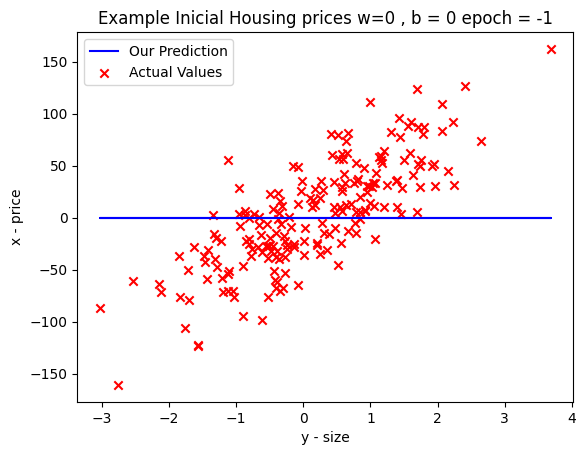

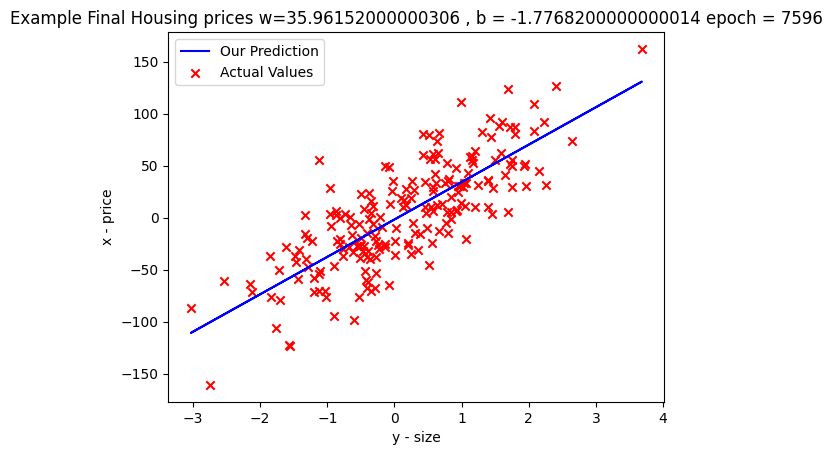

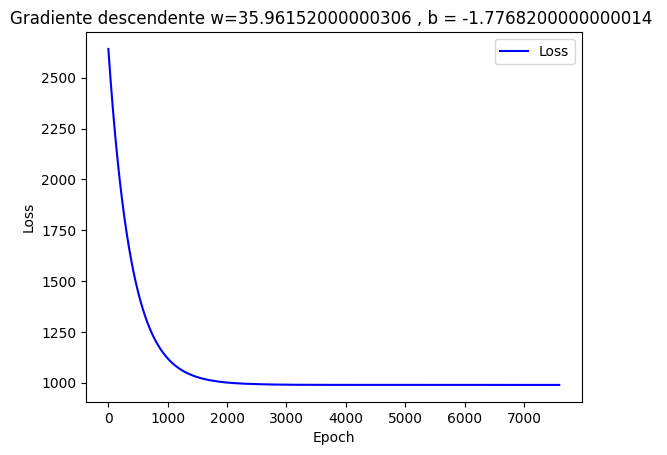

[  12.12596724  -20.23149874   21.00460358  -10.66771261   15.17798361
   36.36625033  -39.18435496   60.98284755  -20.8741497    -4.76084433
  -62.92126933  -17.8686414   -63.72402947   -7.07630605  -14.53826434
   45.03921293   49.65241453  -45.66903867  -17.50090863   36.09157089
   49.90816633   -2.44067316   16.66541803   27.00323551  -20.74157644
   28.50098332    4.37206724   -1.36172718  -33.95116222  -28.36935061
    9.47183157  -23.96790283  -32.89181779  -23.65944537  -29.37381669
   -1.55334141   -6.76682544  -36.34076005    4.50303319  -16.51804865
   58.96097196  -42.27691032   30.93986261  -22.00427882   48.46430201
   17.6411256    48.12763101   22.04511216   18.17549399   79.18745727
  -35.8166845     1.63510077    8.07320421    5.47618292   31.25660004
    5.40554767  -26.24683189   59.91481255  -19.54289467  -60.10539712
  -15.86992356  -54.61275499   41.45834012   19.95336954  -52.75605849
  -10.25161759  -79.15169209  -36.15893354   54.05882036  -16.3323252
  -47.8

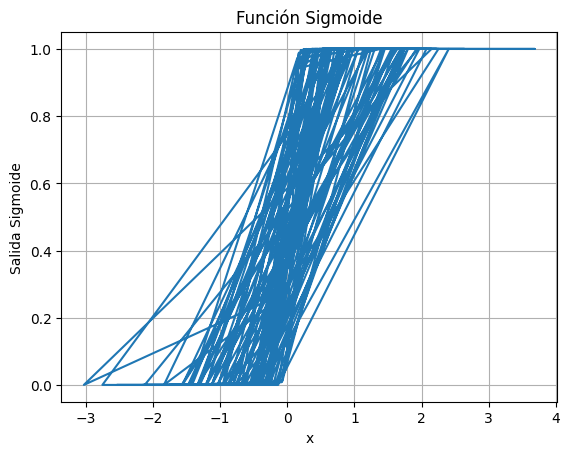

In [22]:
w =0 
b =0 
#Necesita probar los datoc on este alpha 0.001 , 0.01  , 0.1 , 1 ,
# Medir el tiempo
data = pd.read_csv('datos_regresion2.csv')
x_train = data['x'].values
y_train = data['y'].values
alpha = 0.001
mse_valores = []
cont = 0
y_predict = compute_model_output(x_train, w, b)
# gz = generateGZ(x_train,w,b)
graficaExperimente(x_train, y_train, y_predict , w, b , "Inicial" , -1)

loss_almacen = []
i = 0

#Agregar 
#https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

w_values = []
b_values = []

#Graficar w , b y la funcio de costo e una grafica 3d
while True:
# while True:
    loss = MSE(y_train, y_predict)
    loss_almacen.append(round(loss,4))
    w_values.append(w)
    b_values.append(b)
    # graficaExperimente(x_train, y_train, tmp_f_wb , w, b , i)
    # print(f" Learning rate {i} ,  loss = {loss}, w = {w}, b = {b}")
    d_w ,d_b = derivada_parcial_b_w(w, b, y_train, x_train)
    w_temp,b_temp =generate_gradiente(w, b,  alpha , d_w , d_b)
    if w_temp - w <= 0.000001:
        break
    w = w_temp
    b = b_temp
    y_predict = compute_model_output(x_train, w, b)
    i += 1

graficaExperimente(x_train, y_train, y_predict , w, b , "Final" , i)
graficaGradiente(loss_almacen , w, b )
gz = generateGZ(x_train,w,b)
generate_cuartil(x_train)
generate3DCosto(w_values,b_values,loss_almacen)
